# Implementation of Autoencoders

We’ve created an autoencoder comprising two Dense layers: an encoder responsible for condensing the images into a 64-dimensional latent vector and a decoder tasked with reconstructing the initial image based on this latent space.

### Step 1: Import necessary libraries

For the implementation we are going to import matplotlib, numpy, pandas, sklearn and keras. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from keras.datasets import mnist

2025-05-11 10:24:46.110689: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-11 10:24:46.113260: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-11 10:24:46.125194: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-11 10:24:46.159468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746955486.215430   73767 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746955486.23

### Step 2: Load the MNIST dataset 

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))



[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


### Step 3: Define a basic Autoencoder

 - Simple Autoencoder class is defined.
 - Constructor initializes the autoencoder with specified latent dimensions and data shape
 - The encoder and decoder architectures is defined using Sequential model
 - The call method defines the forward pass of the autoencoder where input data is passed through the encoder to obtain encoded data and then through the decoder to obtain the decoded data. 

In [3]:
class SimpleAutoencoder(Model):
    def __init__(self, latent_dimensions):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Flatten(),
            layers.Dense(latent_dimensions, activation='relu'),
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(28 * 28, activation='sigmoid'),
            layers.Reshape((28, 28, 1))
        ])
    
    def call(self, input_data):
        encoded = self.encoder(input_data)
        decoded = self.decoder(encoded)
        return decoded

### Step 4: Compiling and Fitting Autoencoder 

In [4]:
latent_dimensions = 64
autoencoder = SimpleAutoencoder(latent_dimensions)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

E0000 00:00:1746875319.250192  137707 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1746875319.250816  137707 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0958 - val_loss: 0.0322
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0290 - val_loss: 0.0208
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0196 - val_loss: 0.0149
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0143 - val_loss: 0.0114
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0111 - val_loss: 0.0091
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0090 - val_loss: 0.0076
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

### Step 5: Visualize original and reconstructed data 

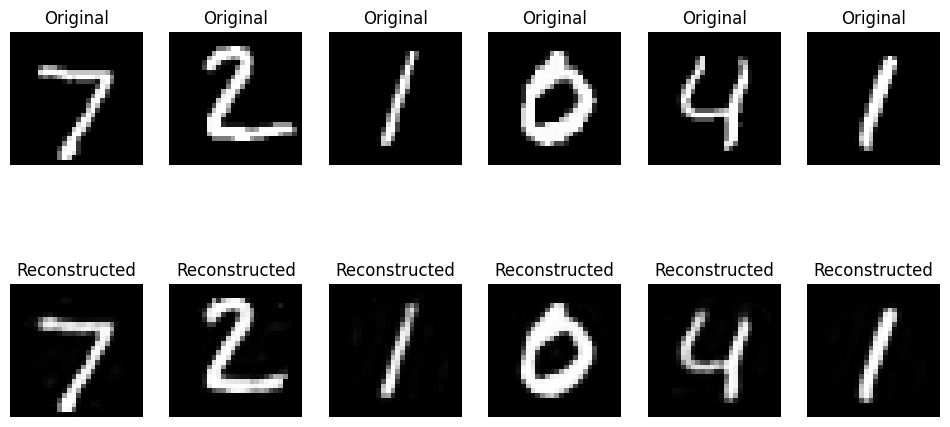

In [5]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 6
plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

## Limitations of Autoencoders

Autoencoders are useful tools but they come with some challenges:

1. **Memorizing Instead of Learning Patterns**: Autoencoders can sometimes memorize the data meaning they just learn to copy the input exactly rather than uncovering the real patterns. When the model memorizes data it doesn’t perform well on new, unseen data which limits its ability to generalize.
2. **Reconstructed Data Might Not Be Perfect**: Even though autoencoders aim to reconstruct the input as accurately as possible the output may not always be perfect. The reconstructed data can sometimes be blurry or distorted. This happens when the autoencoder struggles to capture all the fine details of the input especially when there’s too much noise or if the model’s architecture isn’t powerful enough to handle the complexity.
3. **Requires a Large Dataset and Good Parameter Tuning**: For an autoencoder to perform well it typically needs a large dataset and careful tuning of its parameters (like the size of the latent space or the learning rate). If the dataset is too small or the parameters are not well-tuned the model may fail to learn meaningful representations of the data lead to poor performance.